# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [53]:
# Импортируем все необходимые бибилотеки
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

import catboost as cb

from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Загрузим исходные данные и посмотрим на них
df = pd.read_csv('telecom_users.csv', index_col=0, skipinitialspace=True)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


In [4]:
# Выведем названия признаков
df.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [5]:
# Приведем названия признаков к единому формату
df.rename(columns={'gender':'Gender', 'tenure':'Tenure'}, inplace=True)
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


In [6]:
# Видно, что признак customerID не несет никакой нужной нам информации, поэтому удалим этот признак
df.drop(columns={'customerID'}, inplace=True)

In [7]:
# Узнаем размерность данных
df.shape

(5986, 20)

In [8]:
# Узнаем тип данных
df.dtypes

Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [9]:
# Узнаем какие данные пропущены
df.isna().sum()

Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [10]:
# Основные статистические данные
df.describe(include=np.number)

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5976.000000
mean,0.161377,32.468760,64.802213,2298.060617
std,0.367909,24.516391,30.114702,2274.127165
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.650000,404.312500
50%,0.000000,29.000000,70.400000,1412.150000
75%,0.000000,56.000000,89.900000,3846.962500
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
# Заменим пропущенные значения нулями
df['TotalCharges'].fillna(0, inplace=True)
print('Пропущенных значений в TotalCharges: ', df['TotalCharges'].isna().sum())

Пропущенных значений в TotalCharges:  0


In [12]:
df.shape

(5986, 20)

Вывод. В результате очистки и подготовки мы получили 5976 данных о клиентах и 19 признаков

# 2. Исследование зависимостей и формулирование гипотез

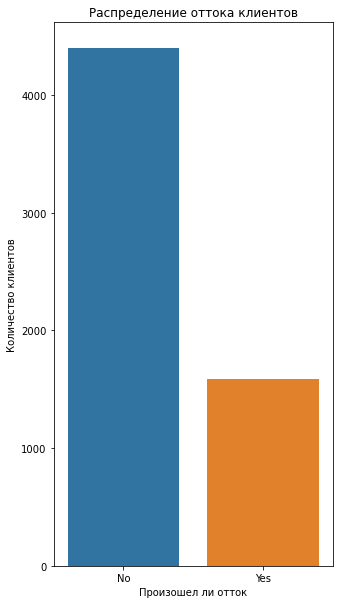

In [13]:
# Проведем анализ целевого признака

# Зададим размер диаграммы
plt.subplots(figsize=(5,10))

# Построим распределение
ax=sns.countplot(df['Churn'])

# Оформление диаграммы
plt.setp(ax, xlabel='Произошел ли отток', ylabel='Количество клиентов', title='Распределение оттока клиентов')

# Вывод диаграммы
plt.show()

### Анализ признаков

Среди клиентов 3050 мужчин и 2936 женщин


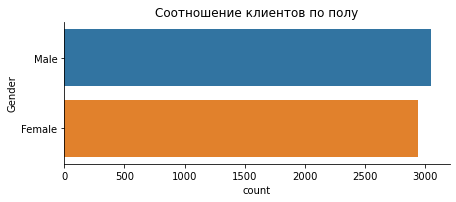

In [17]:
print('Среди клиентов', df[df['Gender']=='Male'].shape[0], 
      'мужчин и',  df[df['Gender']=='Female'].shape[0], 'женщин')
ax = sns.catplot(y='Gender', kind='count', data=df, height=2.5 ,aspect=2.5);
ax.set(title='Соотношение клиентов по полу');

Построим распределения вероятностей для количественных признаков и выявим аномальные значения, если они там есть. В случае наличия выбросов, исключим их из анализа. Для исечения будем использовать правло трех сигм. 

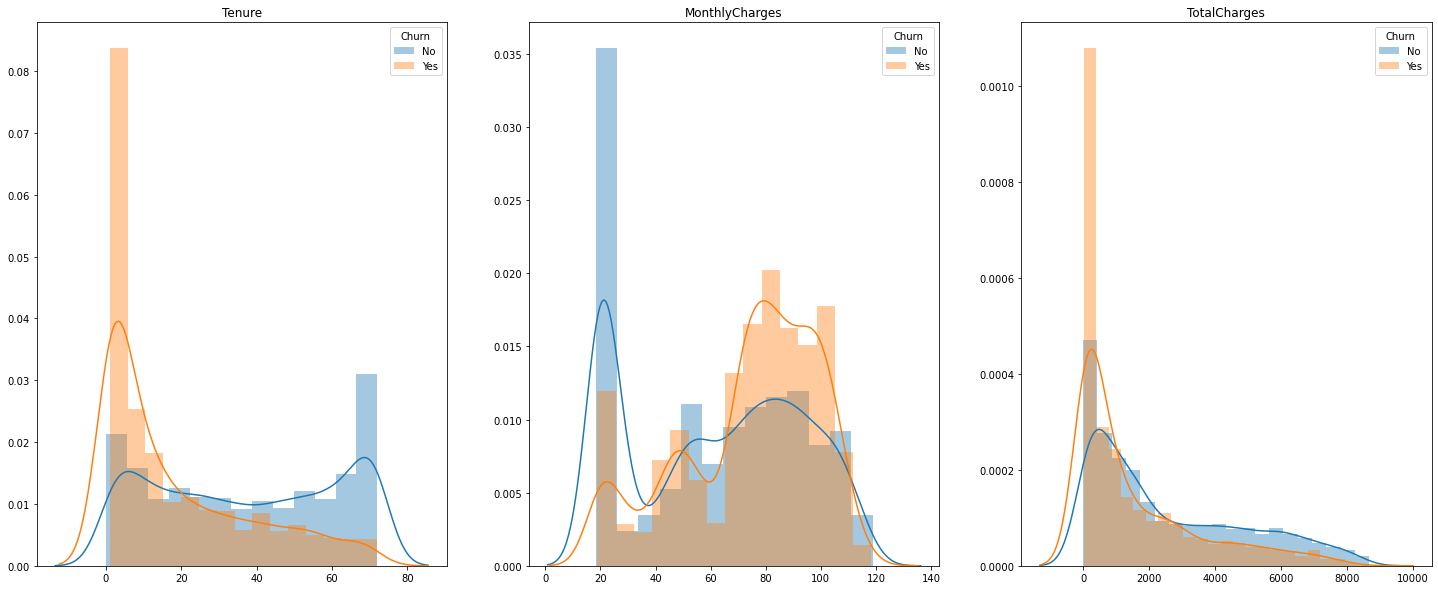

In [18]:
# Создание основных объектов диаграммы
fig, axes = plt.subplots(1,3, figsize=(25, 10))

# Построение диаграмм распределения случайных величин
for column, ax in zip(['Tenure','MonthlyCharges','TotalCharges'], axes.flat):
    sns.distplot(df.query('Churn=="No"')[column], label='No', ax=ax).set_title(column)
    sns.distplot(df.query('Churn=="Yes"')[column], label='Yes', ax=ax).set_title(column)
    ax.legend(loc='upper right', title='Churn')

# Оформление диаграммы
plt.setp(axes, xlabel=None, ylabel=None)

plt.show()

Из полученных гистаграмм видно, что все три признака имеют распределение, близкое к нормальному. При этом, признак MonthlyCharges придеставлен в виде бимодальной гистограммы, что может свидетельствовать о смещении двух различных категорий клиентов. А признаки Tenure и TotalCharges представленны усеченной формой распределения, с резким снижением частот.
В признаке Tenure так же наблюдается зависимость: чем дольше человек является клиентом компании, тем меньше отток. Также присутствует связь между размером ежемесячного платежа и оттоком клиента (выше платеж - больше отток).
Аномальных значений при этом не нанблюдается.

Не продлило договор всего клиентов в датасете: 1587, или 26.51%


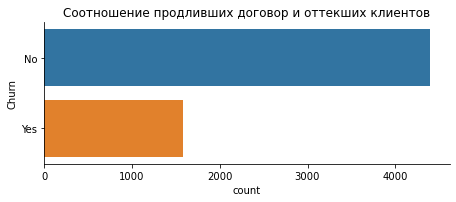

In [19]:
full_client_number = df.shape[0]
print('Не продлило договор всего клиентов в датасете:', 
      f"{df[df['Churn']=='Yes'].shape[0]}, или",
      f"{df[df['Churn']=='Yes'].shape[0]/full_client_number*100:.2f}%")
ax = sns.catplot(y='Churn', kind='count', data=df, height=2.5, aspect=2.5);
ax.set(title='Соотношение продливших договор и оттекших клиентов');

### Поиск зависимостей

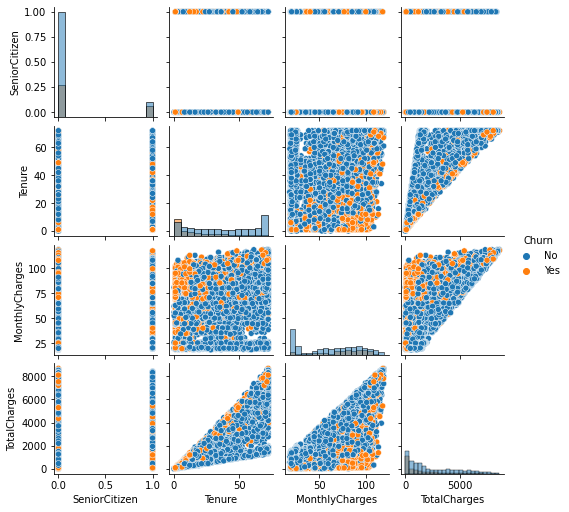

In [20]:
# Используя матрицу рассеивания отразим парное отношение признаков и их распределение.

#Вывод пар признаков в матричном виде
sns.pairplot(df, hue='Churn', diag_kind='hist', height=1.8)

plt.show()

Матрица рассеивания показывает, что имеющиеся численные признаки плохо классифицируются по оттоку клиентов. Тем не менее, признаки TotalCharges, Tenure и MonthlyCharges имеют достаточно высокий характер силы связи.

Также можно обратить внимание, что полученная матрица рассеивания не отражает всех признаков и полной картины линейных взаимосвязей, поэтому имеет смысл ввести дополнительные признаки посредством применения бинарного кодирования (one-hot encoding) к категориальным значениям.

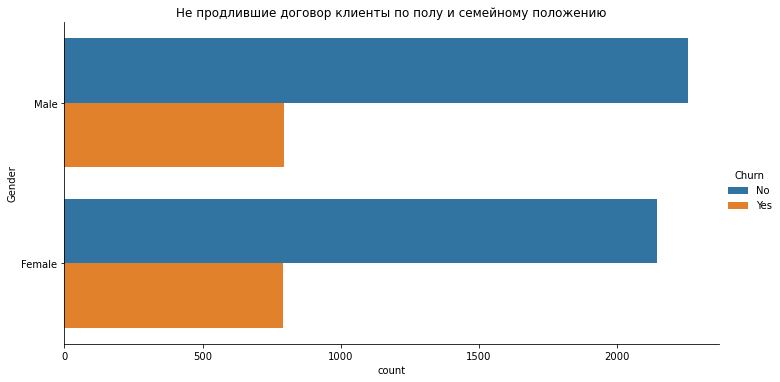

In [21]:
ax = sns.catplot(y='Gender', kind='count', hue='Churn', data=df, aspect=2, height=5)
ax.set(title='Не продлившие договор клиенты по полу и семейному положению');

Семейной положение влияет на отток незначительно

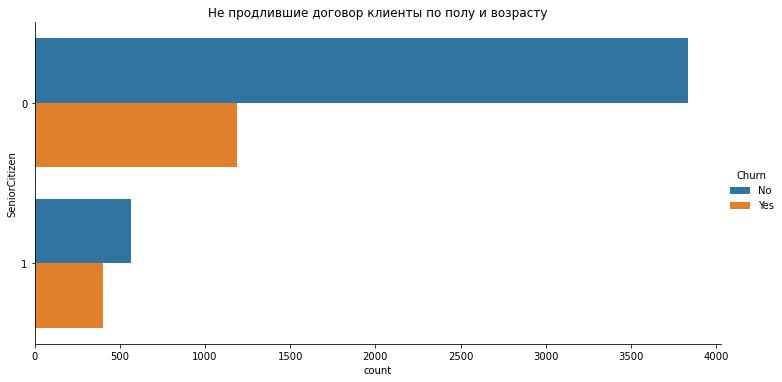

In [22]:
ax = sns.catplot(y='SeniorCitizen', hue='Churn', kind='count', data=df, aspect=2, height=5)
ax.set(title='Не продлившие договор клиенты по полу и возрасту');

Как можно видеть, на продление договора корреляции с полом практически нет, но заметна явная корреляция с возрастом

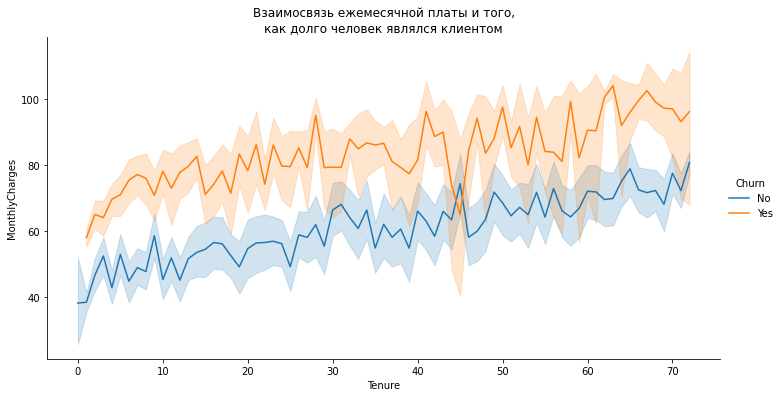

In [23]:
sns.relplot(data=df, x='Tenure', y='MonthlyCharges', hue='Churn', kind='line', aspect=2, height=5)
plt.title('Взаимосвязь ежемесячной платы и того,\nкак долго человек являлся клиентом');

Видно, что ушедшие клиенты в среднем платили больше за услуги.

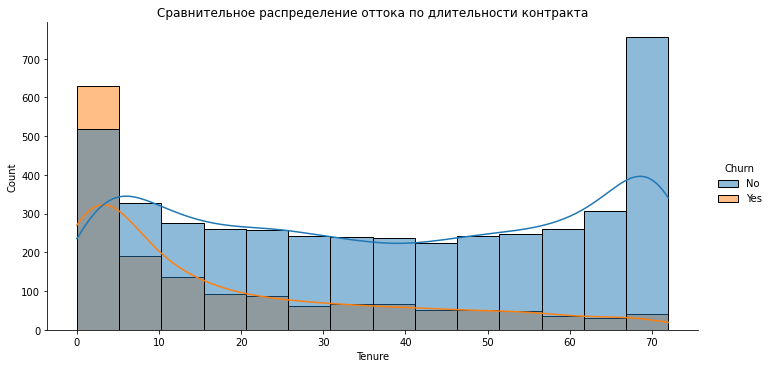

In [24]:
sns.displot(data=df, x='Tenure', hue='Churn', kde=True, height=5, aspect=2)
plt.title('Сравнительное распределение оттока по длительности контракта');

Чем дольше клиентпользуется услугами, тем ниже риск его ухода

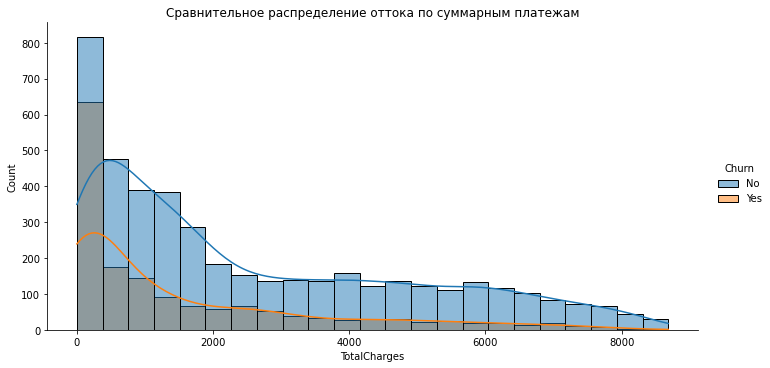

In [25]:
sns.displot(data=df, x='TotalCharges', hue='Churn', kde=True, height=5, aspect=2)
plt.title('Сравнительное распределение оттока по суммарным платежам');

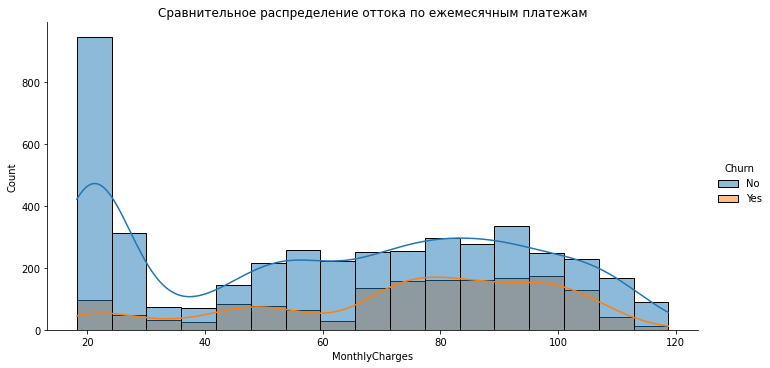

In [26]:
sns.displot(data=df, x='MonthlyCharges', hue='Churn', kde=True, height=5, aspect=2)
plt.title('Сравнительное распределение оттока по ежемесячным платежам');

Чем выше ежемесячные платежи, тем выше риск оттока

Распределения ежемесячной платы и оттока от возраста и семейного положения


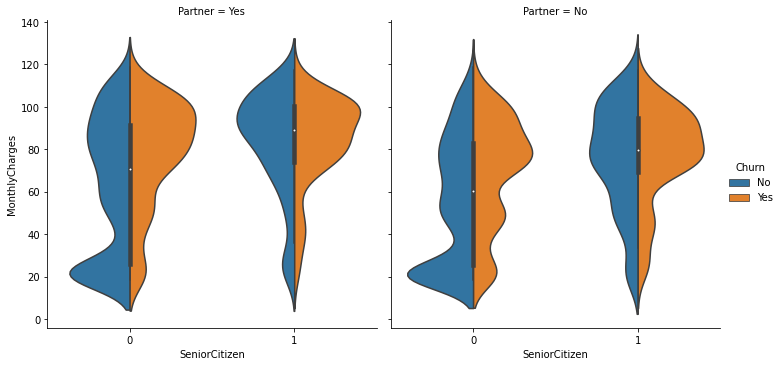

In [27]:
sns.catplot(data=df, 
            y='MonthlyCharges', x='SeniorCitizen', hue='Churn', col='Partner', 
            kind='violin', split=True, orient='v', height=5, aspect=1, legend_out=True);
print('Распределения ежемесячной платы и оттока от возраста и семейного положения');

По графикам видно, что распределение ежемесячной платы и оттока клиентов у пенсионеров/не пенсионеров существенно отличается, и несколько зависит от того, состоит ли клиент в браке

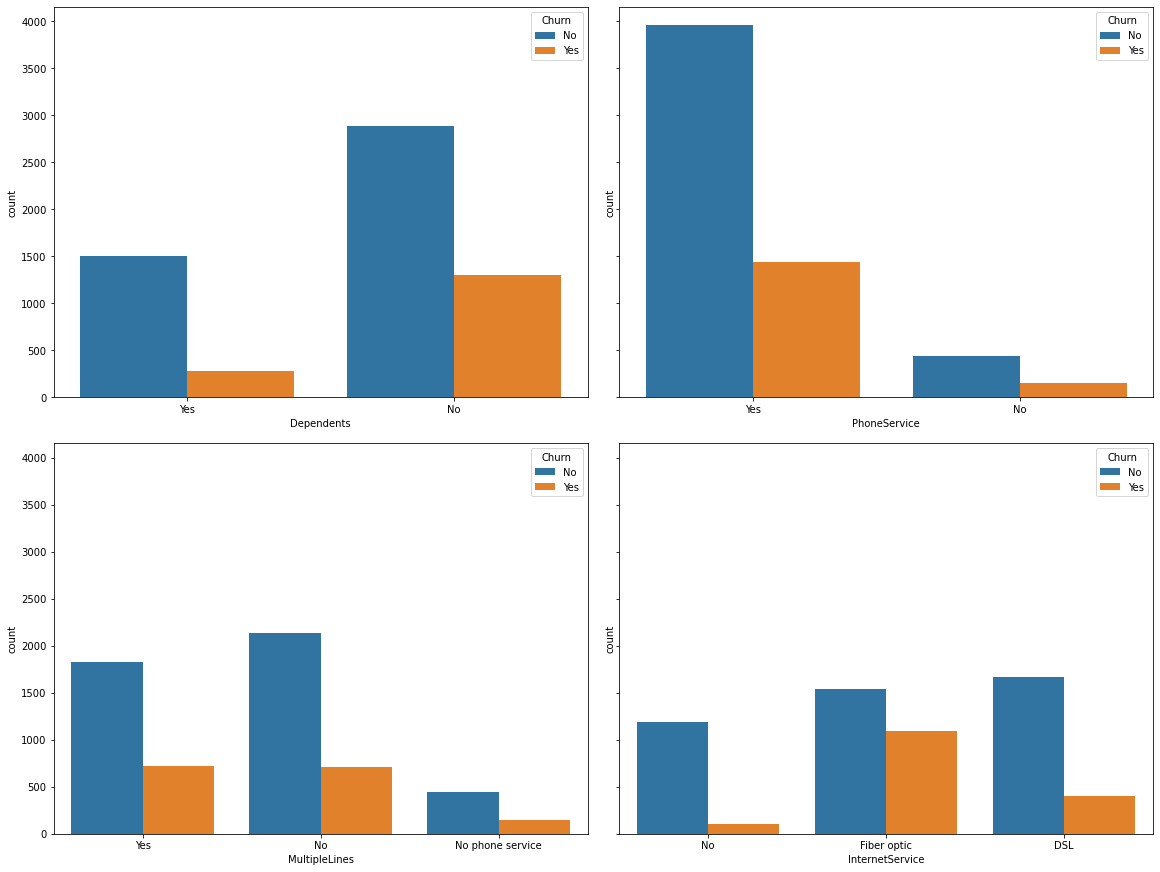

In [28]:
graphs = ['Dependents', 'PhoneService', 
          'MultipleLines', 'InternetService', ]

fig, ax = plt.subplots(2, 2, 
                       figsize=(16, 12), 
                       sharey=True,
                       constrained_layout=True,
                      )

for i, column in enumerate(graphs):
    sns.countplot(x=column, hue='Churn',  data=df, ax=ax[i//2, i%2])

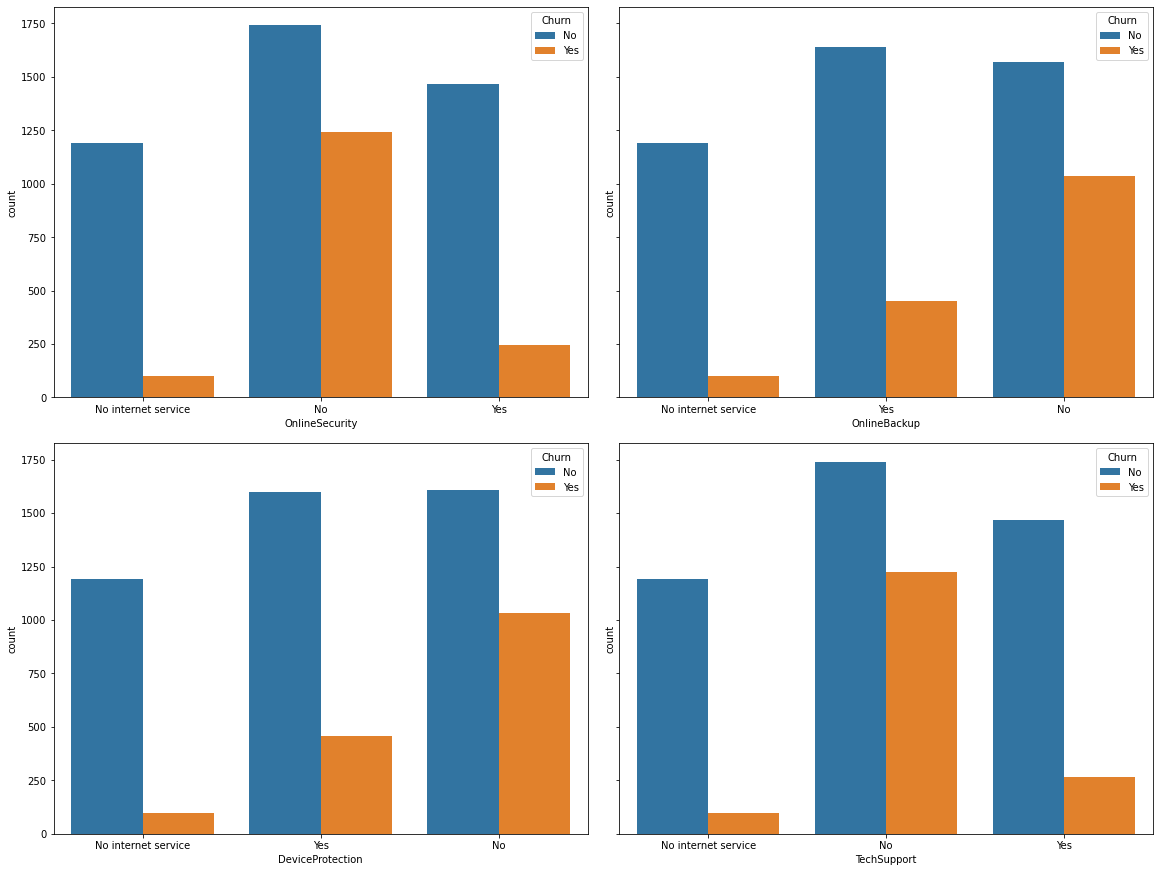

In [70]:
graphs = ['OnlineSecurity', 'OnlineBackup',
         'DeviceProtection', 'TechSupport', ]

fig, ax = plt.subplots(2, 2, figsize=(16, 12), sharey=True, constrained_layout=True)

for i, column in enumerate(graphs):
    sns.countplot(x=column, hue='Churn',  data=df, ax=ax[i//2, i%2])

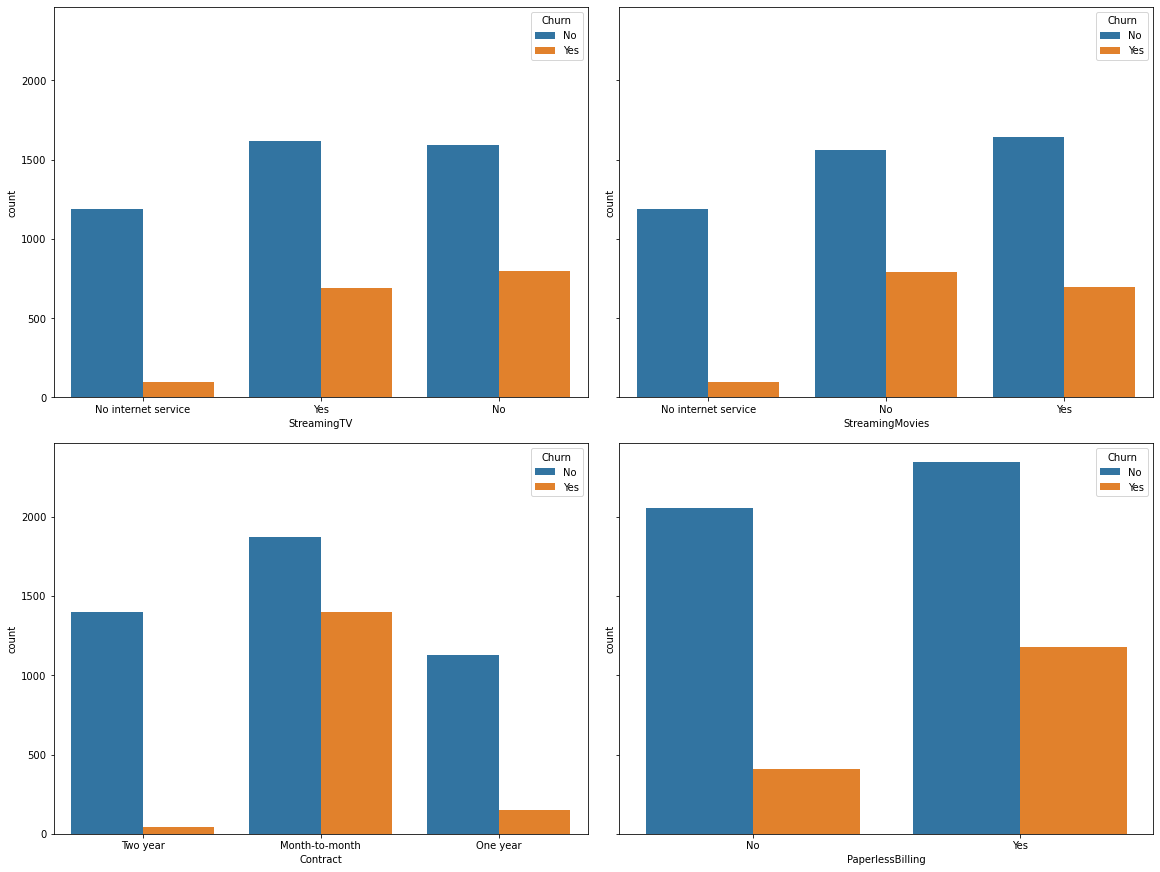

In [29]:
graphs = ['StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling'
         ]

fig, ax = plt.subplots(2, 2, figsize=(16, 12), sharey=True, constrained_layout=True)

for i, column in enumerate(graphs):
    sns.countplot(x=column, hue='Churn',  data=df, ax=ax[i//2, i%2])

Text(0.5, 1.0, 'Разделение оттекших/оставшихся клиентов по методу оплаты')

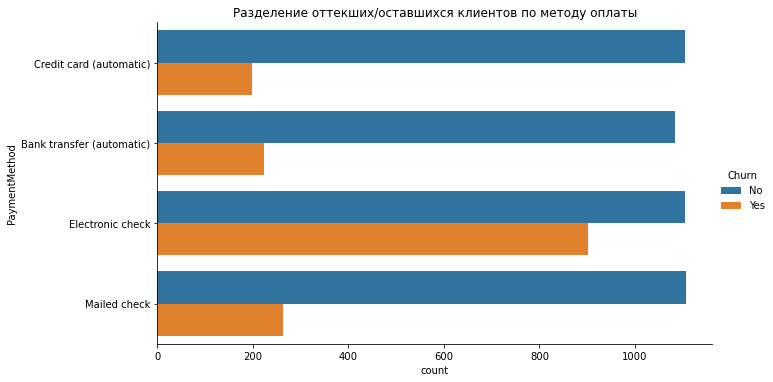

In [30]:
sns.catplot(y='PaymentMethod', hue='Churn',  data=df, kind='count', height=5, aspect=2)
plt.title('Разделение оттекших/оставшихся клиентов по методу оплаты')

### Вывод.

В результате проведенного анализа были определены признаки, которые больше всего могут оказывать влияние на отток клиентов и в последующем будут использованы для прогнозирования целевой переменной.

Также сформулируем ряд предположений, которые проверим в ходе работы:

1. Между выявленными признаками и оттоком клиентов существует линейная зависимость, которая позволит прогнозировать поведение клиентов с достаточной точностью;
2. Подтвердим гипотезу об отсутствии влияния признаков Gender, PhoneService, StreamingTV и StreamingMovies на отток;
3. Модель с лучшим определением групп высокого риска оттока предпочтительнее, чем модель с большим охватом.

# 3. Построение моделей для прогнозирования оттока

Для сравнения качества моделей можно взять метрику Accuracy, но данные не сбалансированы. Количество оттекших клиентов примерно в 4 раза меньше чем оставшихся. Потому возьмем ROC-AUC score.

In [102]:
# Здесь будем собирать оценки результатов работы моделей
model_score = pd.DataFrame(columns=['AUC', 'descr', 'estimator', 'accuracy'])

Будем использовать следующие модели:

1. CatBoostClassifier - так как он имеет поддержку категориальных переменных и обеспечивает высокую точность. Так же CatBoost решает проблему смещения градиента и смещения предсказания, что позволяет уменьшить вероятность переобучения и повысить точность алгоритма.
2. KNeighborsClassifier - как один и самых распространенных и понятных медотов обучения
3. GaussianNB - проверим как будет работать модель с предположением, что все данные не коррелируются друг с другом. 
4. SGDClassifier - будем использовать его как метод оптимизации логистической регрессии (loss='log')
5. XGBClassifier - как один из самых сильных методов бустинга.

In [161]:
# Функция вывода метрик
def print_scores(y_test, y_true):
    print(f'precision_score = {precision_score(y_test, y_true):.6f},', 
          f'recall_score = {recall_score(y_test, y_true):.6f}')
    print(f'accuracy_score = {accuracy_score(y_test, y_true):.6f}')
    print()

In [162]:
# Выведем еще раз колонки датасета 
df.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [163]:
# Сформируем список категориальных фичей в датасете
cat_features = ['Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']

In [164]:
# Заменим данные по оттоку Yes/No на цифровой, для удобства дальнейшей работы
df['Churn'][df['Churn']=='Yes']=1
df['Churn'][df['Churn']=='No']=0
df['Churn'] = df['Churn'].astype('int32')

In [165]:
# Заменим категории на числовые коды
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

cat_features_transformer = ColumnTransformer([
    ('cat_features', OrdinalEncoder(dtype=np.int), cat_features),
    ], remainder='passthrough',
    sparse_threshold=0,
    verbose=True,
)

cat_features_transformer.fit(df)
cat_features_transformer.transform(df)

df = pd.DataFrame(cat_features_transformer.transform(df), columns=df.columns)
df[cat_features] = df[cat_features].astype(np.int)
df

[ColumnTransformer] .. (1 of 2) Processing cat_features, total=   0.0s
[ColumnTransformer] ..... (2 of 2) Processing remainder, total=   0.0s


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,2.0,1,1,1,1,1,1,2,0,1,72,1,2,24.10,1734.65,0.0
1,0,0,0,0,1.0,0,2,2,0,2,0,0,1,1,44,1,0,88.15,3973.20,0.0
2,0,1,1,0,1.0,0,0,0,0,0,0,0,1,0,38,1,2,74.95,2869.85,1.0
3,1,0,0,0,0.0,0,0,0,0,0,2,0,1,2,4,1,0,55.90,238.50,0.0
4,1,0,0,0,0.0,2,0,2,0,0,0,0,0,2,2,1,0,53.45,119.50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,0,1,0,1.0,2,0,0,0,2,2,0,1,2,1,1,0,95.00,95.00,1.0
5982,0,0,1,1,0.0,2,2,2,2,2,2,2,1,1,23,1,2,91.10,2198.30,0.0
5983,1,0,1,1,2.0,1,1,1,1,1,1,0,1,2,12,1,0,21.15,306.05,0.0
5984,1,1,0,0,1.0,0,0,2,0,2,2,0,1,2,12,1,2,99.45,1200.15,1.0


In [175]:
# Разбиение на обучающую и валидационную выборки
X_full = df.drop(columns=['Churn'], axis=1)
y_full = df['Churn'].values
X_train, X_test, y_train, y_test = train_test_split(
    X_full, 
    y_full, 
    test_size=0.3,
    stratify=y_full,
    random_state=110,
)

### Модели машинного обучения

In [176]:
# Обучим и получим предсказания (а так же оценим их качество) для CatBoostClassifier

# Создадим модель
model_cb = cb.CatBoostClassifier(
        iterations=1000,
        depth=6,
        eval_metric='AUC',
        cat_features=cat_features,
        random_state=47,
        task_type='CPU',
    )
# Обучим модель
model_cb.fit(
    X=X_train, 
    y=y_train,
    eval_set=(X_test, y_test),
    early_stopping_rounds=100,
    verbose=100,
)

# Сделаем предсказания на валидационной выборке
pred_cb = model_cb.predict_proba(X_test)[:,1]

# Получим метрику
pred_cb_score = roc_auc_score(y_test, pred_cb)
pred_cb_accuracy = accuracy_score(y_test, model_cb.predict(X_test))

# Вносим метрики в датафрем для хранения оценок
model_score.loc['model_cb'] = [pred_cb_score, 'CatBoost', model_cb, pred_cb_accuracy]

# Посмотрим на AUC
print(f'\nTest AUC for CatBoost is {pred_cb_score:.6f}\n')

# Использую функцию, посмотрим на другие метрики
print_scores(y_test, model_cb.predict(X_test))

Learning rate set to 0.045144
0:	test: 0.8040147	best: 0.8040147 (0)	total: 18ms	remaining: 18s
100:	test: 0.8496881	best: 0.8496881 (99)	total: 1.61s	remaining: 14.3s
200:	test: 0.8513846	best: 0.8518828 (184)	total: 3.17s	remaining: 12.6s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8518827986
bestIteration = 184

Shrink model to first 185 iterations.

Test AUC for CatBoost is 0.851883

precision_score = 0.684350, recall_score = 0.542017
accuracy_score = 0.812361



CatBoostClassifier показал хороший результат AUC (0,8518) на валидационных данных

In [177]:
# Обучим и получим предсказания (а так же оценим их качество) для KNeighborsRegressor

# Создадим модель
model_knr =  make_pipeline(
    MinMaxScaler(),
    KNeighborsClassifier(algorithm='auto', leaf_size=13, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
          weights='uniform')
)

# Обучим модель
model_knr.fit(X_train, y_train)

# Сделаем предсказания на валидационной выборке
pred_knr = model_knr.predict_proba(X_test)[:,1]

# Получим метрику
pred_knr_score = roc_auc_score(y_test, pred_knr)
pred_knr_accuracy = accuracy_score(y_test, model_knr.predict(X_test))

# Вносим метрики в датафрем для хранения оценок
model_score.loc['model_knr'] = [pred_knr_score, 'KNeighbors', model_knr, pred_knr_accuracy]

# Посмотрим на AUC
print(f'\nTest AUC for KNeighborsClassifier is {pred_knr_score:.6f}\n')
# Использую функцию, посмотрим на другие метрики

print_scores(y_test, model_knr.predict(X_test))


Test AUC for KNeighborsClassifier is 0.789425

precision_score = 0.547677, recall_score = 0.470588
accuracy_score = 0.756682



In [178]:
# Обучим и получим предсказания (а так же оценим их качество) для Naive Bayes. Проделаем все шаги, используемые выше

model_nb = make_pipeline(
    ColumnTransformer([
         ('cat_features', OneHotEncoder(), cat_features),
        ], remainder='passthrough', n_jobs=-1, 
        sparse_threshold=0,
        verbose=True),
    MaxAbsScaler(),
    GaussianNB(),
    verbose=True,
)
model_nb.fit(X_train, y_train)
pred_nb = model_nb.predict_proba(X_test)[:,1]
train_nb = model_nb.predict_proba(X_train)[:,1]

pred_nb_score = roc_auc_score(y_test, pred_nb)
pred_nb_accuracy = accuracy_score(y_test, model_nb.predict(X_test))

model_score.loc['model_nb'] = [pred_nb_score, 'Naive Bayes', model_nb, pred_nb_accuracy]

print_scores(y_test, model_nb.predict(X_test))

print(f'\nTest AUC for GaussianNB is {pred_nb_score:.6f}\n')

[Pipeline] . (step 1 of 3) Processing columntransformer, total=   3.0s
[Pipeline] ...... (step 2 of 3) Processing maxabsscaler, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing gaussiannb, total=   0.0s
precision_score = 0.439724, recall_score = 0.804622
accuracy_score = 0.676503


Test AUC for GaussianNB is 0.780615



In [179]:
# Обучим и получим предсказания (а так же оценим их качество) SGDClassifier

from sklearn.linear_model import SGDClassifier

model_sgd = make_pipeline(
    ColumnTransformer([
         ('cat_features', OneHotEncoder(), cat_features),
        ], remainder='passthrough', n_jobs=-1, 
        sparse_threshold=0.3,
        verbose=True),
    MaxAbsScaler(),
    SGDClassifier(
        loss='log',
        random_state=43,
        n_jobs=-1,
    ),
    verbose=True,
)
model_sgd.fit(X_train, y_train)
pred_sgd = model_sgd.predict_proba(X_test)[:,1]
train_sgd = model_sgd.predict_proba(X_train)[:,1]

pred_sgd_score = roc_auc_score(y_test, pred_sgd)
pred_sgd_accuracy = accuracy_score(y_test, model_sgd.predict(X_test))

model_score.loc['model_sgd'] = [pred_sgd_score, 'SGDClassifier', model_sgd, pred_sgd_accuracy]

print_scores(y_test, model_sgd.predict(X_test))

print(f'Test AUC for SGDClassifier is {pred_sgd_score:.6f}\n')

[Pipeline] . (step 1 of 3) Processing columntransformer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing maxabsscaler, total=   0.0s
[Pipeline] ..... (step 3 of 3) Processing sgdclassifier, total=   0.0s
precision_score = 0.695946, recall_score = 0.432773
accuracy_score = 0.799555

Test AUC for SGDClassifier is 0.837466



In [180]:
# Обучим и получим предсказания (а так же оценим их качество) XGBClassifier

# Гиперпараметры модели машинного обучения
params={'n_estimators':[40],
       'max_depth':[2],
       'learning_rate':[0.2]}

# Определение алгоритма модели машинного обучения
model = XGBClassifier(n_jobs=-1, random_state=17)

# Поиск оптимальных параметров модели машинного обучения
xgb_model=GridSearchCV(model, params, scoring='roc_auc', cv=10, n_jobs=-1).fit(X_train, y_train)

pred_xgb = xgb_model.predict_proba(X_test)[:,1]
xgb_model_score = roc_auc_score(y_test, pred_xgb)

pred_xgb_score = roc_auc_score(y_test, pred_xgb)
pred_xgb_accuracy = accuracy_score(y_test, xgb_model.predict(X_test))

# Вывод метрики качества модели
print_scores(y_test, xgb_model.predict(X_test))

model_score.loc['model_xgb'] = [pred_xgb_score, 'XGBClassifier', xgb_model, pred_xgb_accuracy]

print(f'Test AUC for XGBClassifier is {xgb_model_score:.6f}\n')

[15:50:01] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
precision_score = 0.672316, recall_score = 0.500000
accuracy_score = 0.802895

Test AUC for XGBClassifier is 0.852157



### Стекинг

In [181]:
# Импортируем бибилотеку стекинга
from sklearn.ensemble import StackingClassifier


# Зададим параметры стекинга
estimators = [('knn', KNeighborsClassifier(algorithm='auto', leaf_size=13, metric='minkowski', metric_params=None, n_jobs=-1, 
                                           n_neighbors=9, p=2, weights='uniform')), 
              ('svc', SVC(random_state=17)), 
              ('gnb', GaussianNB()), 
              ('sgd', SGDClassifier(loss='log', random_state=43, n_jobs=-1,))]

final_estimator = XGBClassifier(n_jobs=-1, random_state=17)

# Здадаим и обучим модель
stacking = StackingClassifier(estimators=estimators,
                                    final_estimator=final_estimator,
                                    n_jobs=-1).fit(X_train, y_train)
# Сделаем предсказания
pred_stacking = stacking.predict_proba(X_test)[:,1]
stacking_model_score = roc_auc_score(y_test, pred_stacking)

pred_stacking_score = roc_auc_score(y_test, pred_stacking)
pred_stacking_accuracy = accuracy_score(y_test, stacking.predict(X_test))
model_score.loc['stacking'] = [pred_stacking_score, 'Stacking', stacking, pred_stacking_accuracy]

# Проверим качетсво модели
print_scores(y_test, stacking.predict(X_test))
print(f'Test AUC for stacking is {stacking_model_score:.6f}\n')

[15:50:14] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
precision_score = 0.610169, recall_score = 0.453782
accuracy_score = 0.778396

Test AUC for stacking is 0.808417



### Результаты и выводы

В ходе построения моделей прогнозирования оттока клиентов были определены 3 модели, показавшие неплохую метрику качества ROC_AUC:


1. CatBoostClassifier - 0.851883
2. SGDClassifier (для логистической регрессии) - 0.837466
3. XGBClassifier - 0.852157


Поскольку в области принятия решений предпочтительнее опираться на вероятность, также определим значения вероятностей оттока клиентов. Предсказание вероятности ухода позволит понять к какому из клиентов следует обратиться в первую очередь, а к кому в последнюю.

# 4. Сравнение качества моделей 

### Метрики качества моделей

In [182]:
model_score

,AUC,descr,estimator,accuracy
model_xgb,0.852157,XGBClassifier,"GridSearchCV(cv=10,\n estimator=XG...",0.802895
model_cb,0.851883,CatBoost,<catboost.core.CatBoostClassifier object at 0x...,0.812361
model_sgd,0.837466,SGDClassifier,"(ColumnTransformer(n_jobs=-1, remainder='passt...",0.799555
stacking,0.808417,Stacking,"StackingClassifier(estimators=[('knn',\n ...",0.778396
model_knr,0.789425,KNeighbors,"(MinMaxScaler(), KNeighborsClassifier(leaf_siz...",0.756682
model_nb,0.780615,Naive Bayes,"(ColumnTransformer(n_jobs=-1, remainder='passt...",0.676503


In [183]:
# Сортировка оценок работ моделей
model_score.sort_values('AUC', ascending=False, inplace=True)
model_score[['AUC', 'descr', 'accuracy']]

,AUC,descr,accuracy
model_xgb,0.852157,XGBClassifier,0.802895
model_cb,0.851883,CatBoost,0.812361
model_sgd,0.837466,SGDClassifier,0.799555
stacking,0.808417,Stacking,0.778396
model_knr,0.789425,KNeighbors,0.756682
model_nb,0.780615,Naive Bayes,0.676503


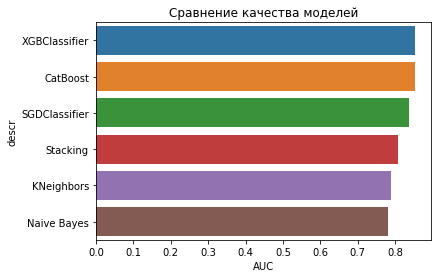

In [184]:
ax = sns.barplot(x='AUC', y='descr', data=model_score)
plt.title('Сравнение качества моделей');
plt.show()

### Вероятность оттока

Определим функцию сравнения прогнозных вероятностей оттока клиентов, полученных с помощью модели машинного обучения, с фактическими исходами.

In [133]:
def predict_probabilities(model, x, y):
    # Определение вероятности исхода для всех клиентов
    predict_proba = model.predict_proba(x)
    
    # Выборка вероятностей для ушедших клиентов с округлением значений для укрупненного подсчета
    predict_churn = np.round(predict_proba[:,1], 1)
    
    # Подсчет количества вероятностей ушедших клиентов
    value_churn = pd.value_counts(predict_churn)
    
    # Выборка истинных исходов ушедших клиентов
    true_churn = y==1
    
    # Определение доли истинных исходов ушедших клиентов или реальная вероятность ухода клиента
    true_proba = [np.mean(true_churn[predict_churn==value]) for value in value_churn.index]
    
    # Объединение вероятностей в датафрейм
    result_df = pd.concat([value_churn.reset_index(), pd.Series(true_proba)], axis=1)
    
    # Указание названий столбцов и сортировка значений в датафрейме
    result_df.columns = ['Прогнозная вероятность', 'Кол. ушедших', 'Истинная вероятность']
    result_df = result_df.sort_values('Прогнозная вероятность', ascending=False).reset_index(drop=True)
            
    # Возвращение датафрейма
    return result_df

### XGBClassifier 

In [185]:
# Вывод вероятностей ухода клиентов
predict_probabilities(xgb_model, X_test, y_test)

,Прогнозная вероятность,Кол. ушедших,Истинная вероятность
0,0.9,7,0.714286
1,0.8,49,0.918367
2,0.7,85,0.729412
3,0.6,143,0.615385
4,0.5,144,0.548611
5,0.4,164,0.402439
6,0.3,199,0.266332
7,0.2,239,0.188285
8,0.1,332,0.075301
9,0.0,434,0.018433


### CatBoost

In [187]:
# Вывод вероятностей ухода клиентов
predict_probabilities(model_cb, X_test, y_test)

,Прогнозная вероятность,Кол. ушедших,Истинная вероятность
0,1.0,1,1.000000
1,0.9,15,0.733333
2,0.8,68,0.897059
3,0.7,86,0.674419
4,0.6,121,0.595041
5,0.5,157,0.522293
6,0.4,149,0.422819
7,0.3,196,0.260204
8,0.2,227,0.185022
9,0.1,293,0.071672


### SGDClassifier

In [188]:
# Вывод вероятностей ухода клиентов
predict_probabilities(model_sgd, X_test, y_test)

,Прогнозная вероятность,Кол. ушедших,Истинная вероятность
0,0.9,5,0.800000
1,0.8,49,0.857143
2,0.7,84,0.714286
3,0.6,111,0.702703
4,0.5,115,0.530435
5,0.4,151,0.390728
6,0.3,181,0.331492
7,0.2,225,0.257778
8,0.1,356,0.101124
9,0.0,519,0.034682


Из полученных результатов прогноза оттока клиентов можно сказать, что CatBoost показывает более близкую вероятность ухода клиента к фактическому исходу, чем остальные. Поскольку вероятность оттока клиентов позволяет оценить не только степень уверенности потери клиента, но и понять с какой группой клиентов следует работать в первую очередь, можно допустить, что из трех выбранных моделей для Компании выгоднее смотрится CatBoost.

### Результаты и выводы

Подводя итоги по проекту можно сделать следующие выводы:

1. Раннее выдвинутое предположение о высокой степени связи признаков Tenure, MonthlyCharges, TotalCharges с целевой переменной подтвердилось;

2. Подтвердилась гипотеза об отсутствии влияния признаков Gender, PhoneService, StreamingTV, StreamingMovies на отток клиентов;

3. Предсказывая отток, Компании важно не упустить клиентов, которые на самом деле уйдут, то есть свести к минимуму ложноотрицательные прогнозы моделей и ориентироваться на метрику полноты (Recall). Наивный байесовский классификатор превзошел остальные модели с показателем 0.804622. По показателю полноты данную модель будем считать лучшей;

4. Нас интересует как полнота прогнозирования, так и интерпретируемость модели. Разделяя клиентов по степени уверенности потери, на основе показателя точности (Precision), можем выявить первоочередные группы (группы высокого риска). Точное и своевременное нахождение таких групп позволит эффективно бороться с оттоком. Учитывая немаловажность показателя точности в области принятия решений, допускаю, что модель с лучшим определением групп высокого риска предпочтительнее для Компании, чем модель с большим охватом оттока. Поэтому модель CatBoosting для бизнеса подходит больше (Precision = 0.684350), чем модель Байесовского классификатора;

5. В проекте не были затронуты темы профилирования и сегментации клиентов, что не позволит Компании адресно и точно взаимодействовать с клиентами, особенно с клиентами склонных к оттоку и в целом снизит эффективность управления оттоком;

6. Также можно отметить, что количество предоставленных данных (клиентов) недостаточно для построения точной модели и важно продолжать расширять клиентскую базу.